In [14]:
import openai
import pennylane as qml
from PIL import Image
import numpy as np

In [15]:
# is_arr = prob_image_arr(input_arr, api_key)
# print(is_arr)

In [16]:
import pennylane as qml
from scipy.optimize import minimize
# from pennylane import numpy as np




In [17]:
n_qubits = 8
dev = qml.device('default.qubit', wires=n_qubits)

In [18]:
def find_n_largest_numbers(arr, n):
    # Find the indices of the n largest elements
    indices = np.argsort(arr)[-n:]
    # Find the n largest elements
    largest_elements = arr[indices]
    return largest_elements, indices

def indices_to_binary(indices):
    # Convert each index to binary and ensure it's 8 bits
    return [format(index, f'0{n_qubits}b') for index in indices]

def int_to_binary(n, digits):
    binary_str = format(n, 'b')
    # Pad the binary string with leading zeros to ensure it has 'digits' length
    return binary_str.zfill(digits)

In [19]:
# Define the quantum circuit
@qml.qnode(dev)
def circuit(param,index):
    index = int_to_binary(index,n_qubits)
    for i, char in enumerate(index):
        if(char=='1'):
            qml.PauliX(wires=i)
        # qml.Hadamard(wires=i)
            
    qml.StronglyEntanglingLayers(weights=param, wires=range(n_qubits))
    # qml.BasicEntanglerLayers(weights=param, wires=range(n_qubits))
    # return qml.probs(wires=range(n_qubits))
    out = [qml.expval(qml.PauliZ(0)),qml.expval(qml.PauliZ(1)),qml.expval(qml.PauliZ(2)),qml.expval(qml.PauliZ(3)),qml.expval(qml.PauliZ(4)),qml.expval(qml.PauliZ(5)),qml.expval(qml.PauliZ(6)),qml.expval(qml.PauliZ(7))]
    # out = np.array(out)
    return out


In [20]:
def convert_to_int(nested_list):
    return [[int(element) for element in sublist] for sublist in nested_list]

def binary_array_to_png_and_display(binary_array, scale_factor=10):
    # binary_array = convert_to_int(binary_array)
    # Convert the binary array to a numpy array with values 0 and 255
    image_array = np.array(binary_array) * 255

    # Create an image object from the numpy array
    image = Image.fromarray(np.uint8(image_array), 'L')

    # Scale the image
    original_size = image.size
    scaled_size = tuple([dimension * scale_factor for dimension in original_size])
    scaled_image = image.resize(scaled_size, Image.NEAREST)
    display(scaled_image)


In [21]:
def feature_map(input_arr):
    """Flatten the 2D binary array into a 1D feature map."""
    return [item for sublist in input_arr for item in sublist]

def cosine_similarity(vec1, vec2):
    """Calculate the cosine similarity between two vectors."""
    vec1, vec2 = np.array(vec1), np.array(vec2)
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    if(norm_vec2*norm_vec1==0): return 0
    similarity = dot_product / (norm_vec1 * norm_vec2)
    return similarity

In [22]:
a = int_to_binary(4,5)
for i, char in enumerate(a):
    if(char=='1'):
        print(True)

True


In [23]:
# smiley_pattern = np.array([
#         [0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 0, 1, 0, 0, 1, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 1, 0, 0, 0, 0, 1, 0],
#         [0, 0, 1, 1, 1, 1, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0]
#     ])

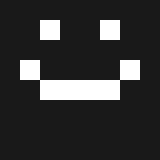

In [24]:

smiley_pattern = np.array([
        [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
        [0.1,0.1, 1,0.1,0.1, 1,0.1,0.1],
        [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
        [0.1, 1,0.1,0.1,0.1,0.1, 1,0.1],
        [0.1,0.1, 1, 1, 1, 1,0.1,0.1],
        [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
        [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
        [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
    ])
binary_array_to_png_and_display(smiley_pattern,scale_factor=20)

smiley_pattern_vec = feature_map(smiley_pattern)

0: ────╭StronglyEntanglingLayers(M0)─┤  <Z>
1: ────├StronglyEntanglingLayers(M0)─┤  <Z>
2: ────├StronglyEntanglingLayers(M0)─┤  <Z>
3: ────├StronglyEntanglingLayers(M0)─┤  <Z>
4: ────├StronglyEntanglingLayers(M0)─┤  <Z>
5: ────├StronglyEntanglingLayers(M0)─┤  <Z>
6: ────├StronglyEntanglingLayers(M0)─┤  <Z>
7: ──X─╰StronglyEntanglingLayers(M0)─┤  <Z>
M0 = 
[[[0.65628283 0.93696663 0.90351186]
  [0.45137094 0.99462231 0.05766212]
  [0.07096057 0.31631684 0.23905139]
  [0.27548965 0.05200087 0.45678334]
  [0.72104074 0.770803   0.93991873]
  [0.23992509 0.96474398 0.32323926]
  [0.12676795 0.43207197 0.12828127]
  [0.29078678 0.38628275 0.45863172]]

 [[0.61683315 0.23131471 0.85224653]
  [0.3045245  0.40412288 0.69768212]
  [0.23020353 0.00216569 0.45247456]
  [0.74758745 0.49854598 0.23470691]
  [0.99527788 0.62586891 0.64577111]
  [0.02593038 0.69113106 0.8147622 ]
  [0.03590642 0.15850512 0.15687664]
  [0.28528044 0.86110482 0.33208813]]

 [[0.68927851 0.83711807 0.9061647 ]
  [0.9149

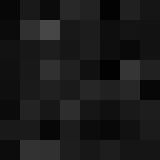

Current loss: 0.3627829490278417


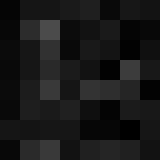

Current loss: 0.28438194711360043


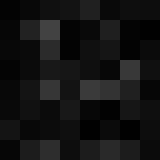

Current loss: 0.2344726550594295


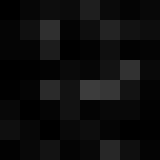

Current loss: 0.18597231507391687


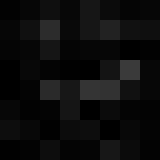

Current loss: 0.13969104850211145


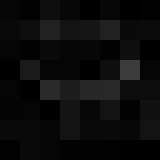

Current loss: 0.10882017373369934


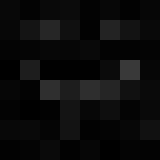

Current loss: 0.08003932726611751


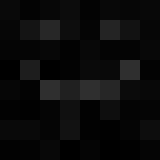

Current loss: 0.06167032546076556


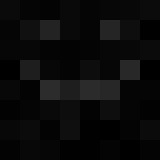

Current loss: 0.05359146411434601


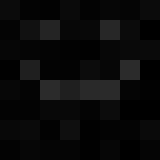

Current loss: 0.044166797591428164


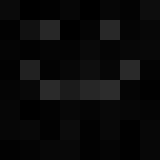

Current loss: 0.03999712865565419


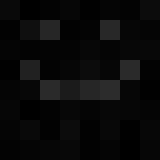

Current loss: 0.03294781968774918


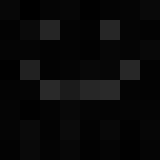

Current loss: 0.02307519792273438


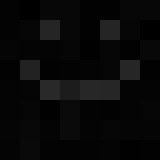

Current loss: 0.01923441160546857


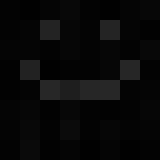

Current loss: 0.016083085316355494


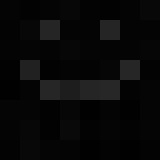

Current loss: 0.012931273411596167


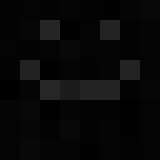

Current loss: 0.012217821483152314


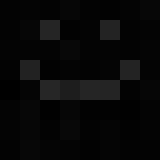

Current loss: 0.011033613758051564


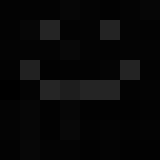

Current loss: 0.009403798845194156
Tuned with threshod :  0.01


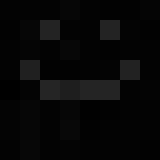

Current loss: 0.008278323403343002
Tuned with threshod :  0.01


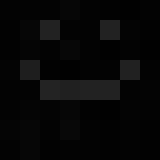

Current loss: 0.008035351969060911
Tuned with threshod :  0.01


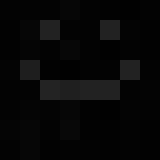

Current loss: 0.007588663609205071
Tuned with threshod :  0.01


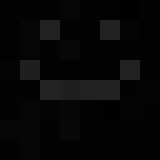

Current loss: 0.006827970632969582
Tuned with threshod :  0.01


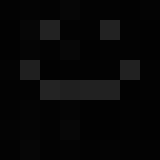

Current loss: 0.005898158563510836
Tuned with threshod :  0.01


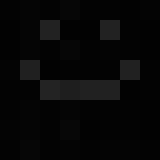

Current loss: 0.005593175763724423
Tuned with threshod :  0.01


KeyboardInterrupt: 

In [25]:
# Define the shape of the parameters
shape_p = qml.StronglyEntanglingLayers.shape(n_layers=4, n_wires=n_qubits)
# shape_p = qml.BasicEntanglerLayers.shape(n_layers=2, n_wires=n_qubits)


param_updated = None


# Define the objective function (to be minimized)
def objective(params):
    # print(params)
    original_length = np.prod(shape_p)
    # Extract segments for each set of weights
    weights_p1_flat = params[0 : original_length]
    # print('Param')
    # print(weights_p1_flat)
    # weights_p2_flat = params[original_length : 2*original_length]
    # weights_p3_flat = params[2*original_length : 3*original_length]
    # weights_p4_flat = params[3*original_length : 4*original_length]

    # Reshape each segment
    weights_p1 = weights_p1_flat.reshape(shape_p)
    # print(weights_p1)
    # weights_p2 = weights_p2_flat.reshape(shape_p)
    # weights_p3 = weights_p3_flat.reshape(shape_p)
    # weights_p4 = weights_p4_flat.reshape(shape_p)
    # print('===================')
    image_arr = []
    for i in range(n_qubits):
        arr = circuit(weights_p1,i)
        # largest_elements, indices = find_n_largest_numbers(arr, 1)
        # Convert indices to binary
        # binary_indices = indices_to_binary(indices)
        # print(binary_indices)
        # print(arr)
        image_arr.append(arr)
    image_arr=abs(np.array(image_arr))
    # raise Exception
    # print('==============')
    # print(image_arr)
    # Display the image
    # binary_array_to_png_and_display(image_arr,scale_factor=20)
    # print(prob_image_arr(image_arr,api_key))
    # image_arr = convert_to_int(image_arr)
    # generated_img_feature_map = feature_map(convert_to_int(image_arr))
    generated_img_feature_map = feature_map(image_arr)
    score = cosine_similarity(smiley_pattern_vec,generated_img_feature_map)
    # print(1-score)
    # raise Exception

    
    # print("Largest elements:", largest_elements)
    # print("Indices:", indices)
    # print("Indices in binary:", binary_indices)

    return 1-score

def callback(params):
    global param_updated

    original_length = np.prod(shape_p)
    # Extract segments for each set of weights
    weights_p1_flat = params[0 : original_length]
    weights_p1 = weights_p1_flat.reshape(shape_p)
    param_updated = weights_p1
    image_arr = []
    for i in range(n_qubits):
        arr = circuit(weights_p1,i)
        # largest_elements, indices = find_n_largest_numbers(arr, 1)
        # Convert indices to binary
        # binary_indices = indices_to_binary(indices)
        # print(binary_indices)
        # print(arr)
        image_arr.append(arr)
    image_arr=abs(np.array(image_arr))
    binary_array_to_png_and_display(image_arr,scale_factor=20)
    loss = objective(params)
    print("Current loss:",loss)
    Threshold = 0.01
    if loss<Threshold:
        print("Tuned with threshod : ",Threshold)
        return True

    

# Initialize the weights
weights_p1 = np.random.random(size=shape_p)
# weights_p2 = np.random.random(size=shape_p)
# weights_p3 = np.random.random(size=shape_p)
# weights_p4 = np.random.random(size=shape_p)

# Flatten and concatenate the initial parameters
init_params = np.concatenate([weights_p1.flatten()])
print(qml.draw(circuit)(weights_p1,1))

# Optimize using BFGS algorithm
opt = minimize(objective, init_params, method='BFGS',callback=callback)


In [26]:
print(param_updated)

[[[ 6.56282606e-01  1.13739293e+00  1.13177959e+00]
  [ 4.51370648e-01  1.09905714e+00  1.54563095e-01]
  [ 7.09603359e-02  8.64134182e-01  6.40625701e-01]
  [ 2.75489566e-01  4.00516901e-01  6.86000317e-01]
  [ 7.21040465e-01  7.63457925e-01  1.19797282e+00]
  [ 2.39924890e-01  7.02223181e-01  8.41284380e-01]
  [ 1.26767758e-01  4.75273249e-01  1.59965397e-01]
  [ 2.90786672e-01  4.78980130e-01  5.04520782e-01]]

 [[ 7.84551836e-01  4.48837641e-01  1.31951328e+00]
  [ 1.90756349e-01  6.67082575e-01  1.00597073e+00]
  [ 2.47780171e-01  8.71581698e-02  6.97656494e-01]
  [ 7.96608616e-01  3.88991218e-01  7.82443033e-01]
  [ 8.36296022e-01  1.00832919e+00  7.55220104e-01]
  [ 4.16645355e-01  1.15083268e+00  2.37126883e-01]
  [ 3.77979345e-01  3.41391516e-01  5.19632830e-01]
  [ 4.33692932e-01  7.23211812e-01  6.22754266e-01]]

 [[ 4.93190752e-02  7.61405957e-01  1.20158622e+00]
  [ 8.66896051e-01  1.09392616e+00  8.32117570e-01]
  [ 1.17958542e+00  6.84695054e-01  8.92080123e-01]
  [ 8.15

In [27]:
# print("Optimized Parameters:", opt.x)
# print("Optimized Expectation Value:", opt.fun)

# original_length = np.prod(shape_p)
# params = opt.x
# # Extract segments for each set of weights
# weights_p1_flat = params[0 : original_length]
# # weights_p2_flat = params[original_length : 2*original_length]
# # weights_p3_flat = params[2*original_length : 3*original_length]
# # weights_p4_flat = params[3*original_length : 4*original_length]

# # Reshape each segment
# weights_p1 = weights_p1_flat.reshape(shape_p)
# # weights_p2 = weights_p2_flat.reshape(shape_p)
# # weights_p3 = weights_p3_flat.reshape(shape_p)
# # weights_p4 = weights_p4_flat.reshape(shape_p)
# # print(circuit_res(weights_p1,weights_p2,weights_p3,weights_p4)

In [28]:
def convert_param_to_imageArr(param):
    image_arr = []
    for i in range(n_qubits):
        arr = circuit(param,i)
        # largest_elements, indices = find_n_largest_numbers(arr, 1)
        # Convert indices to binary
        # binary_indices = indices_to_binary(indices)
        # print(binary_indices)
        # print(arr)
        image_arr.append(arr)
    image_arr=abs(np.array(image_arr))
    return image_arr


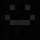

In [42]:
output_img = convert_param_to_imageArr(param_updated)
binary_array_to_png_and_display(output_img,scale_factor=5)

In [30]:
# !pip install opencv-python


In [31]:
import cv2
import numpy as np

def enhance_edges(image, edge_factor=1.5, contrast_factor=2.0):
    # Convert image to grayscale if it's not already (assuming image is in grayscale)
    if len(image.shape) > 2:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image

    # Use the Sobel operator to find edges in the image
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    
    # Calculate the magnitude of the gradients
    sobel_magnitude = np.sqrt(sobelx**2 + sobely**2)
    
    # Normalize and scale the magnitude to enhance edges
    sobel_normalized = cv2.normalize(sobel_magnitude, None, 0, 255, cv2.NORM_MINMAX)
    edges_enhanced = np.clip(sobel_normalized * edge_factor, 0, 255).astype(np.uint8)
    
    # Combine the edge-enhanced image with the original image to increase edge contrast
    enhanced_image = cv2.addWeighted(gray.astype(np.uint8), contrast_factor, edges_enhanced, 1, 0)
    
    # Clip values to ensure they stay within [0, 255]
    enhanced_image = np.clip(enhanced_image, 0, 255).astype(np.uint8)
    
    return enhanced_image


# Load an image (replace 'path_to_image' with your actual image path)
# image_path = 'path_to_image.jpg'
# image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)



In [ ]:
enhanced_image = enhance_edges(image=output_img)

In [36]:
# # Enhance edges in the image
# 
# print(enhance_edges)
# # Display the original and enhanced images
# cv2.imshow('Original Image', output_img)
# cv2.imshow('Enhanced Image', enhanced_image)
# # cv2.waitKey(0)
# # cv2.destroyAllWindows()

<function enhance_edges at 0x000002A024A319E0>


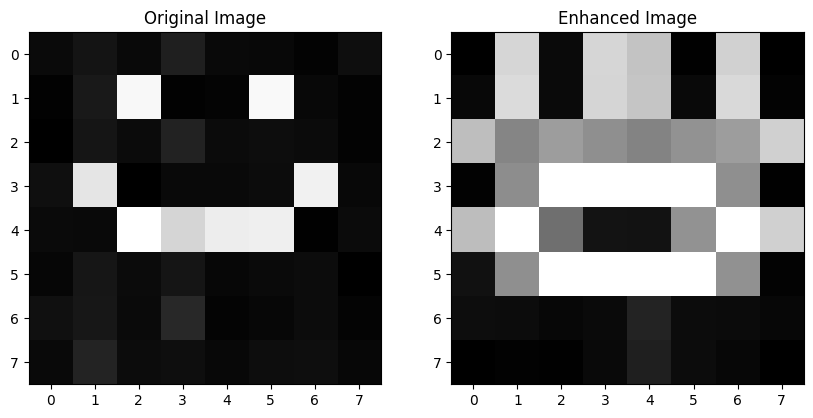

In [46]:
import matplotlib.pyplot as plt

# Display the original and enhanced images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(output_img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(enhanced_image, cmap='gray')
plt.title('Enhanced Image')

plt.show()